In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-18 04:27:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2022-09-18 04:27:45 (34.7 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.shape

(20640, 10)

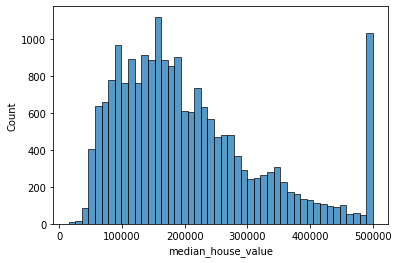

In [5]:
sns.histplot(data.median_house_value)

Look at the median_house_value variable. Does it have a long tail? - YES!

In [6]:
del data['ocean_proximity']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


##Question 1
Find a feature with missing values. How many missing values does it have?

In [8]:
data[data.columns[data.isnull().sum() != 0]].isnull().sum()

total_bedrooms    207
dtype: int64

##Question 2
What's the median (50% percentile) for variable 'population'?

In [9]:
data.population.median()

1166.0

## Split the data

In [10]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(12384, 4128, 4128)

In [11]:
# Shuffle the initial dataset, use seed 42

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)
idx[:5]

# array([20046,  3024, 15663, 20484,  9814])

array([20046,  3024, 15663, 20484,  9814])

In [12]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution

data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]

data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [13]:
data_train.shape[0], data_val.shape[0], data_test.shape[0]

(12384, 4128, 4128)

In [14]:
for elem in [data_train, data_val, data_test]:
  elem = elem.reset_index(drop=True, inplace=True)

data_train.head()  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [15]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [16]:
# Make sure that the target value ('median_house_value') is not in your dataframe

for elem in [data_train, data_val, data_test]:
  del elem['median_house_value']

data_train.head()  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


##Question 3
1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)
7. Which option gives better RMSE?

In [17]:
# We need to deal with missing values for the column from Q1

data_train[data_train.columns[data_train.isnull().sum() != 0]].isnull().sum()

total_bedrooms    207
dtype: int64

In [18]:
data_train.total_bedrooms.mean()

533.4803317730147

In [19]:
# We have two options: fill it with 0 or with the mean of this variable

def fillna_0(X):
  return X.fillna(0).values

def fillna_mean(X):
  return X.fillna(data_train.total_bedrooms.mean()).values  

X_train_fillna_0 = fillna_0(data_train)
X_train_fillna_mean = fillna_mean(data_train)

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
# Train a linear regression model without regularization using the code from the lessons

w0_fillna_0, w_fillna_0 = train_linear_regression(X_train_fillna_0, y_train)
w0_fillna_mean, w_fillna_mean = train_linear_regression(X_train_fillna_mean, y_train)

In [23]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def test_lin_reg(X, y, w0, w):
  y_pred = w0 + X.dot(w)
  return round(rmse(y, y_pred), 2)     

print('fill with 0: rmse = ', test_lin_reg(fillna_0(data_val), y_val, w0_fillna_0, w_fillna_0))
print('fill with the mean: rmse = ', test_lin_reg(fillna_mean(data_val), y_val, w0_fillna_mean, w_fillna_mean))

fill with 0: rmse =  0.33
fill with the mean: rmse =  0.33


Which option gives better RMSE? - Answer: Both are equally good

##Question 4
1. Now let's train a regularized linear regression.
2. For this question, fill the NAs with 0.
3. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
4. Use RMSE to evaluate the model on the validation dataset.
5. Round the RMSE scores to 2 decimal digits.
6. Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [24]:
# Now let's train a regularized linear regression

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [25]:
# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    # For this question, fill the NAs with 0
    X_train = fillna_0(data_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = fillna_0(data_val)
    
    print(r, w0, test_lin_reg(X_val, y_val, w0, w))

0 -11.686975242036546 0.33
1e-06 -11.686959175728921 0.33
0.0001 -11.685368865034667 0.33
0.001 -11.670931317799797 0.33
0.01 -11.528493585632091 0.33
0.1 -10.274500282195673 0.33
1 -4.920480897742212 0.33
5 -1.482095745621172 0.34
10 -0.7899311831779245 0.34


Which r gives the best RMSE? If there are multiple options, select the smallest r - Answer: 0

##Question 5
1. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
2. Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
3.  For each seed, do the train/validation/test split with 60%/20%/20% distribution.
4. Fill the missing values with 0 and train a model without regularization.
5. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
6. What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
7. Round the result to 3 decimal digits (round(std, 3))

In [31]:
scores_dict = {}
scores_list = []

for num in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  idx = np.arange(n)

  np.random.seed(num)
  np.random.shuffle(idx)

  data_train = data.iloc[idx[:n_train]]
  data_val = data.iloc[idx[n_train:n_train + n_val]]
  data_test = data.iloc[idx[n_train + n_val:]]

  y_train = np.log1p(data_train.median_house_value.values)
  y_val = np.log1p(data_val.median_house_value.values)
  y_test = np.log1p(data_test.median_house_value.values)

  for elem in [data_train, data_val, data_test]:
    del elem['median_house_value'] 

  X_train = fillna_0(data_train)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = fillna_0(data_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  
  scores_dict[num] = score
  scores_list.append(score)

scores = np.array(scores_list)
round(np.std(scores), 3)

0.004

In [32]:
scores_dict

{0: 0.33884304805312054,
 1: 0.3362387255956152,
 2: 0.3320912318841953,
 3: 0.34051536090333206,
 4: 0.3389024066572496,
 5: 0.3434866725718243,
 6: 0.3451980953099226,
 7: 0.33959899274099314,
 8: 0.3466230873184584,
 9: 0.33659261241692773}

##Question 6
1. Split the dataset like previously, use seed 9.
2. Combine train and validation datasets.
3. Fill the missing values with 0 and train a model with r=0.001.
4. What's the RMSE on the test dataset?

In [33]:
np.random.seed(9)
np.random.shuffle(idx)

data_train = data.iloc[idx[:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]

y_train = np.log1p(data_train.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

for elem in [data_train, data_test]:
  del elem['median_house_value']

X_train = fillna_0(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = fillna_0(data_test)
test_lin_reg(X_test, y_test, w0, w)

0.35